
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [42]:
## 깃허브 : https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA/tree/master
## ARIMA-And-Seasonal-ARIMA

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
dataset_filepath = '/content/drive/MyDrive/ARIMA-And-Seasonal-ARIMA-master/interest-avg_trends.csv'

In [47]:
# df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
df=pd.read_csv(dataset_filepath)

In [6]:
df.head()
# gold_df = gold_df.rename(columns={'Price USD per Oz':'Gold_Price'})

,Date,Cycle_Curve
0,1987-02-01,-0.372408
1,1987-03-01,-0.014840
2,1987-04-01,0.166318
3,1987-05-01,0.423830
4,1987-06-01,-0.138891


In [ ]:
df.tail()

,Date,Cycle_Curve
427,2022-09-01,0.732087
428,2022-10-01,0.579221
429,2022-11-01,0.525129
430,2022-12-01,0.453894
431,2023-01-01,-0.122650


In [48]:
# Convert Month into Datetime
df['Date']=pd.to_datetime(df['Date'])

In [49]:
df.head()

,Date,Cycle_Curve
0,1987-02-01,-0.372408
1,1987-03-01,-0.014840
2,1987-04-01,0.166318
3,1987-05-01,0.423830
4,1987-06-01,-0.138891


In [50]:
df.set_index('Date',inplace=True)

In [51]:
df.head()

,Cycle_Curve
Date,
1987-02-01,-0.372408
1987-03-01,-0.014840
1987-04-01,0.166318
1987-05-01,0.423830
1987-06-01,-0.138891


In [ ]:
df.describe()

,Cycle_Curve
count,432.000000
mean,-0.045224
std,0.218581
min,-0.985739
25%,-0.138352
50%,-0.038099
75%,0.061464
max,1.050515


## Step 2: Visualize the Data

<Axes: xlabel='Date'>

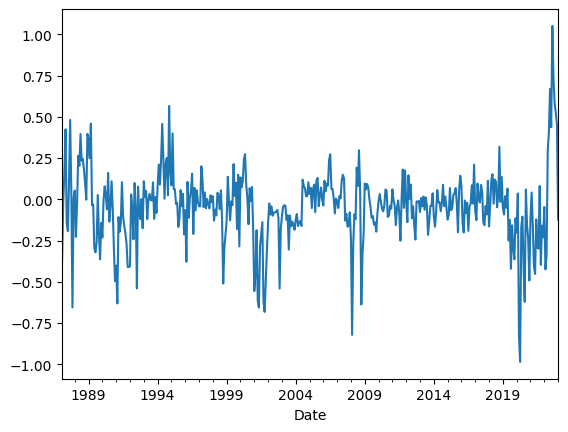

In [52]:
df['Cycle_Curve'].plot()
# df.plot()

In [54]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [55]:
## Data가 Stationary(정상성) 특성을 보이는지 테스트하는 코드
test_result=adfuller(df['Cycle_Curve'])

In [56]:
## ## Data가 Stationary(정상성) 특성을 보이는지 테스트하고 결과를 보여주는 함수
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [57]:

adfuller_test(df['Cycle_Curve'].diff().dropna())

ADF Test Statistic : -7.889188573482485
p-value : 4.483993153437415e-12
#Lags Used : 12
Number of Observations Used : 418
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

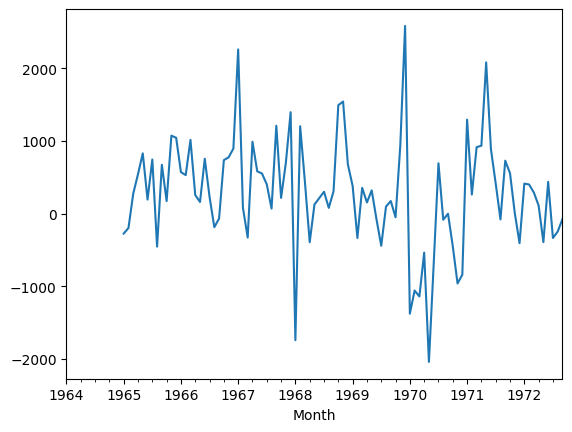

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

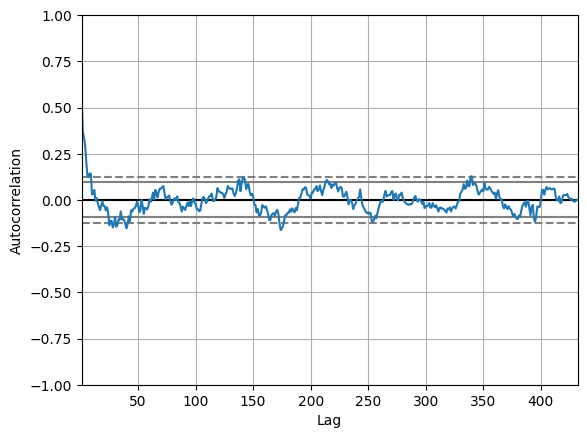

In [58]:
# 시계열에 대한 자기상관 도표.
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Cycle_Curve'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [59]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


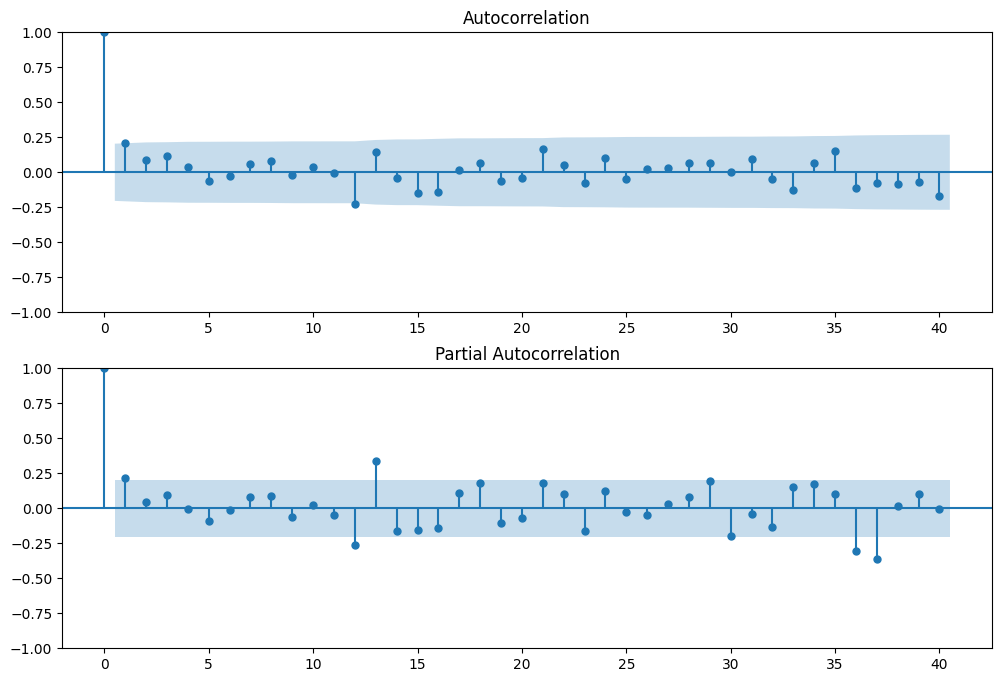

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [60]:
# For non-seasonal data
#p=1, d=1, q=0 or 1

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [61]:
model=ARIMA(df['Cycle_Curve'].diff().dropna(), order=(1,1,1))
model_fit=model.fit() # 학습시키기

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Cycle_Curve   No. Observations:                  432
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 117.584
Date:                Thu, 27 Jul 2023   AIC                           -229.169
Time:                        07:50:17   BIC                           -216.970
Sample:                    02-01-1987   HQIC                          -224.352
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3521      0.052      6.714      0.000       0.249       0.455
ma.L1         -0.8521      0.028    -30.318      0.000      -0.907      -0.797
sigma2         0.0339      0.002     22.005      0.000       0.031       0.037
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               136.01
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.27
Prob(H) (two-sided):                  0.99   Kurtosis:                         5.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# model_fit.plot_diagnostics(figsize=(12, 8))

In [62]:
df['forecast_ARIMA']=model_fit.predict(start="2023-01-01",end="2026-01-01",dynamic=True)

In [63]:
# 여기 년도는 years=x  range 범위는 1 = 1년
# 여기 월별로는 months=x  range 범위는 1 = 1달
from pandas.tseries.offsets import DateOffset
# future_dates_arima=[df.index[-1]+ DateOffset(years=x) for x in range(0,24)]  # 24년
future_dates_arima=[df.index[-1]+ DateOffset(months=x) for x in range(0,36)]  # 3년

In [64]:
future_datest_df_arima=pd.DataFrame(index=future_dates_arima[1:],columns=df.columns)

In [65]:
future_datest_df_arima.tail(5)

,Cycle_Curve,forecast_ARIMA
2025-08-01,NaN,NaN
2025-09-01,NaN,NaN
2025-10-01,NaN,NaN
2025-11-01,NaN,NaN
2025-12-01,NaN,NaN


In [66]:
future_df_arima=pd.concat([df,future_datest_df_arima])

<Axes: >

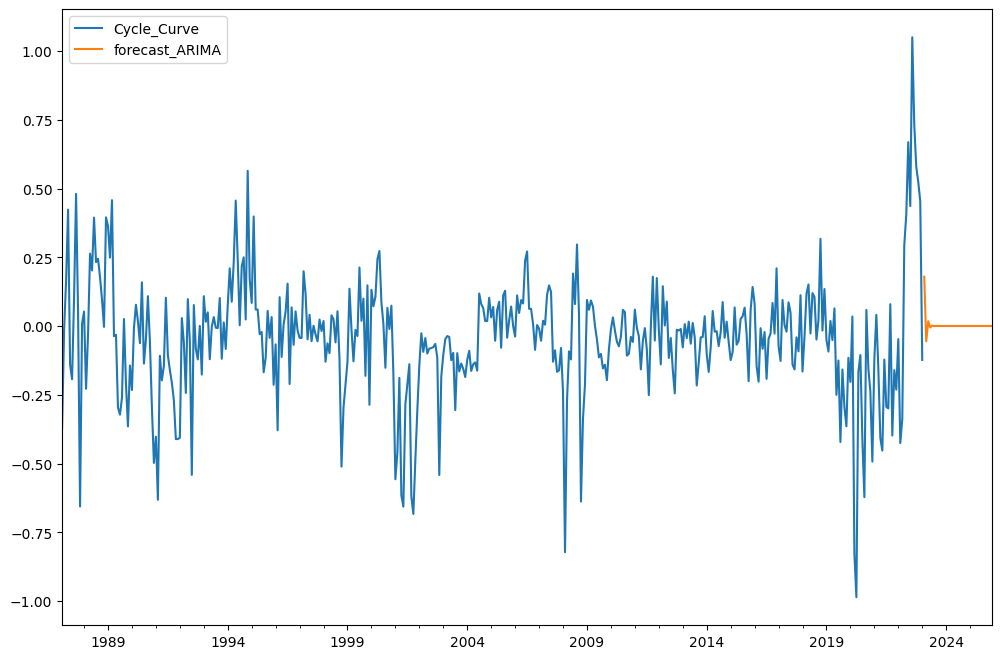

In [67]:
future_df_arima['forecast_ARIMA'] = model_fit.predict(start = "2023-02-01", end = "2026-01-01", dynamic= True)
future_df_arima[['Cycle_Curve', 'forecast_ARIMA']].plot(figsize=(12, 8))

In [68]:
future_df_arima.tail()

,Cycle_Curve,forecast_ARIMA
2025-08-01,NaN,0.000698
2025-09-01,NaN,0.000698
2025-10-01,NaN,0.000698
2025-11-01,NaN,0.000698
2025-12-01,NaN,0.000698


In [69]:
import statsmodels.api as sm

In [70]:
# 월단위는 seasonal_order=(1,1,1,4)
# 년단위는 seasonal_order=(1,1,1,12)
# model=sm.tsa.statespace.SARIMAX(df['Cycle_Curve'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
model=sm.tsa.statespace.SARIMAX(df['Cycle_Curve'],order=(1, 1, 1),seasonal_order=(1,1,1,4))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
# results.plot_diagnostics(figsize=(12, 8))

In [71]:
df['forecast_SARIMA']=results.predict(start="2024-01-01",end="2026-01-01",dynamic=True)
# df[['Cycle_Curve','forecast_SARIMA']].plot(figsize=(12,8))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [73]:
# 여기 년도는 years=x
# 여기 월별로는 months=x
from pandas.tseries.offsets import DateOffset
# future_dates_sarima=[df.index[-1]+ DateOffset(years=x) for x in range(0,21)] #이건 year라서 20년
future_dates_sarima=[df.index[-1]+ DateOffset(months=x) for x in range(0,36)]  #이건 months라서 1년 주려면 12 줘야함

In [74]:
future_datest_df_sarima=pd.DataFrame(index=future_dates_sarima[1:],columns=df.columns)

In [75]:
future_datest_df_sarima.tail(5)
# df.tail()

,Cycle_Curve,forecast_ARIMA,forecast_SARIMA
2025-08-01,NaN,NaN,NaN
2025-09-01,NaN,NaN,NaN
2025-10-01,NaN,NaN,NaN
2025-11-01,NaN,NaN,NaN
2025-12-01,NaN,NaN,NaN


In [76]:
future_df_sarima=pd.concat([df,future_datest_df_sarima])

<Axes: >

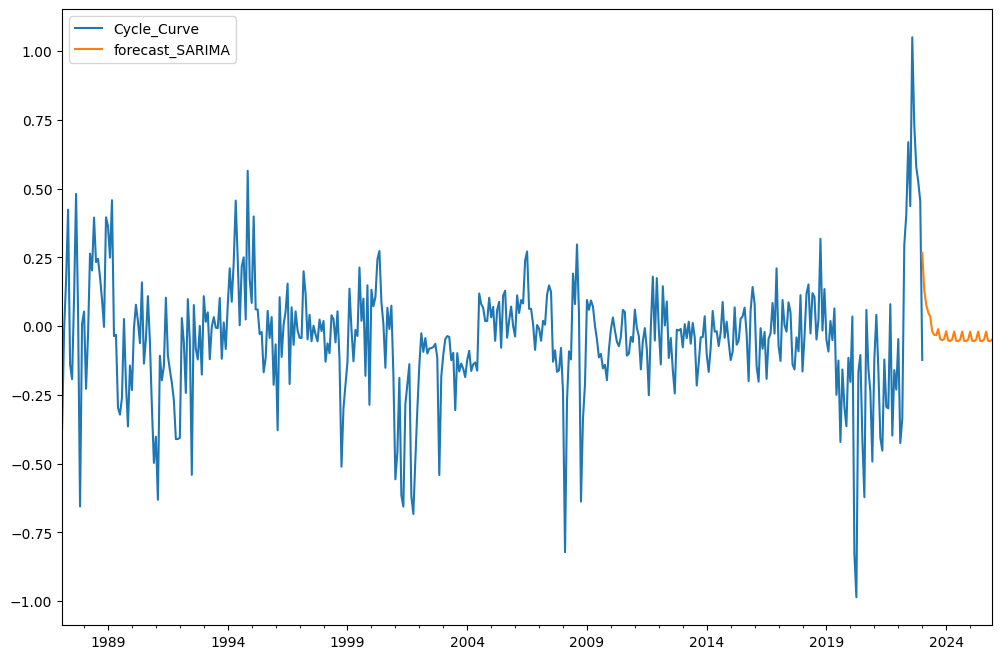

In [77]:
future_df_sarima['forecast_SARIMA'] = results.predict(start = "2023-01-01", end = "2026-01-01", dynamic= True)
future_df_sarima[['Cycle_Curve', 'forecast_SARIMA']].plot(figsize=(12, 8))